In [1]:
# KMeans 데이터 분석

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Windows 기본 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

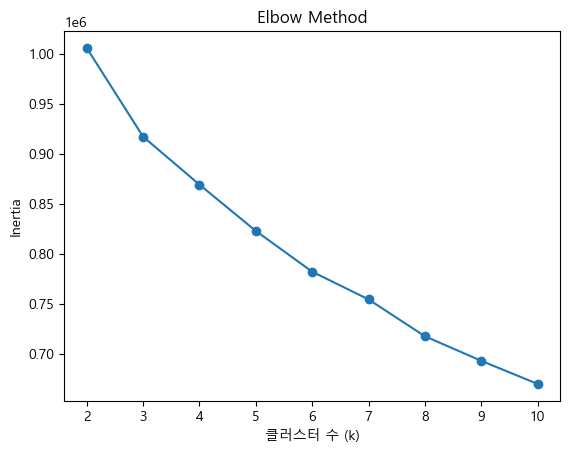

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv("health_sample.csv")

# 분석에 사용할 컬럼 선택 (예시: 수치 기반 변수만)
features = [
    '신장(5cm단위)', '체중(5kg단위)', '허리둘레',
    '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
    '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤',
    'LDL콜레스테롤', '감마지티피', '시도코드'
]

# 결측치 제거
df_selected = df[features].dropna()

# 정규화 (스케일링)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

# 최적 클러스터 수 찾기 (엘보우 메서드)
inertia = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# 결과 시각화
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('클러스터 수 (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


Cluster	건강 상태 요약

0	🔵 정상 또는 건강한 그룹
- 혈압, 혈당, 콜레스테롤, 간수치 모두 양호
- HDL(좋은 콜레스테롤)이 가장 높고, 감마지티피(간 기능)도 낮음

1	🟡 과체중/경도 대사이상 가능성
- 허리둘레와 체중 증가, 공복혈당과 혈압도 다소 높음
- HDL 낮고, 트리글리세라이드도 증가함

2	🔴 대사증후군/고위험군
- 키와 체중 모두 매우 크고, 허리둘레, 혈압, 혈당 모두 높음
- 트리글리세라이드, LDL(나쁜 콜레스테롤), 감마지티피 모두 높음
- HDL은 최저

3	🟠 고콜레스테롤군
- 콜레스테롤, LDL 수치가 매우 높음
- 상대적으로 키, 체중은 작고 혈당도 낮음
- 혈압은 높은 편, 간수치는 보통

In [8]:
# 클러스터링 실행 (k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
df_selected['cluster'] = kmeans.fit_predict(X_scaled)

# 각 군집의 평균값 확인
cluster_means = df_selected.groupby('cluster').mean()
print(cluster_means)


          신장(5cm단위)  체중(5kg단위)       허리둘레       수축기혈압      이완기혈압  식전혈당(공복혈당)  \
cluster                                                                        
0        158.150599  54.452759  73.882581  115.310108  70.324691   93.886097   
1        169.772922  73.738503  87.601063  120.621755  73.462126  102.352859   
2        167.801658  75.725156  89.826162  132.315472  83.343872  106.789111   
3        154.719189  56.872220  80.489284  133.708541  79.198859  108.145797   

             총콜레스테롤    트리글리세라이드   HDL콜레스테롤    LDL콜레스테롤      감마지티피       시도코드  
cluster                                                                       
0        215.473752   89.243798  67.447760  130.006891  22.987789  32.848407  
1        168.304296  115.604942  50.651760   94.496096  34.185259  33.678617  
2        229.733536  181.805417  51.096367  142.400036  61.809177  34.140547  
3        165.538258  110.577212  56.483443   86.744395  29.326324  35.086849  


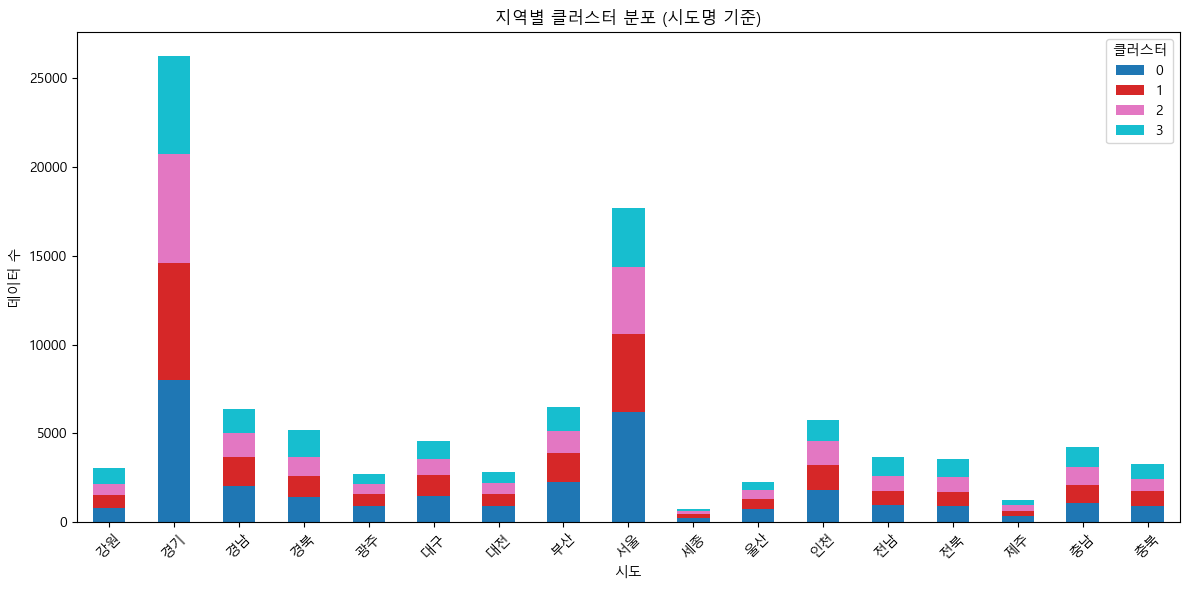

In [9]:
# 시도코드 → 시도명 매핑 딕셔너리
sido_map = {
    11: '서울', 26: '부산', 27: '대구', 28: '인천', 29: '광주',
    30: '대전', 31: '울산', 36: '세종', 41: '경기', 42: '강원',
    43: '충북', 44: '충남', 45: '전북', 46: '전남', 47: '경북',
    48: '경남', 49: '제주'
}

# 시도명 컬럼 추가
df_selected['시도명'] = df_selected['시도코드'].map(sido_map)

# 시도별 클러스터 분포 집계
region_cluster_counts = pd.crosstab(df_selected['시도명'], df_selected['cluster'])

# 시각화
region_cluster_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.xlabel('시도')
plt.ylabel('데이터 수')
plt.title('지역별 클러스터 분포 (시도명 기준)')
plt.legend(title='클러스터')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 데이터 불러오기
df = pd.read_csv("health_sample.csv")  # 파일 경로에 맞게 수정

# 클러스터링에 사용할 피처
features = [
    '신장(5cm단위)', '체중(5kg단위)', '허리둘레',
    '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
    '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤',
    'LDL콜레스테롤', '감마지티피'
]

# 결측 제거
df_selected = df[features].dropna()

# 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

# KMeans 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)
df_selected['cluster'] = kmeans.fit_predict(X_scaled)

# 클러스터 결과를 원본 df에 반영
df_clustered = df.loc[df_selected.index].copy()
df_clustered['cluster'] = df_selected['cluster'].values

# 질병 의심 항목
disease_columns = ['당뇨병의심', '고혈압의심', '고지혈증의심', '비만의심']

# 클러스터별 질병 의심 비율 계산
disease_ratios = {}
for disease in disease_columns:
    ratio = df_clustered.groupby('cluster')[disease].value_counts(normalize=True).unstack().fillna(0)
    disease_ratios[disease] = ratio

# 결과 정리
disease_summary_df = pd.concat(disease_ratios, axis=1)
disease_summary_df.columns = ['{}_{}'.format(disease, val) for disease, val in disease_summary_df.columns]

# 결과 출력
print(disease_summary_df)


          당뇨병의심_0   당뇨병의심_1   고혈압의심_0   고혈압의심_1  고지혈증의심_0  고지혈증의심_1    비만의심_0  \
cluster                                                                         
0        0.981884  0.018116  0.986056  0.013944  0.905285  0.094715  0.792051   
1        0.820005  0.179995  0.782780  0.217220  0.817588  0.182412  0.279010   
2        0.891146  0.108854  0.773374  0.226626  0.490497  0.509503  0.081382   
3        0.956218  0.043782  0.789309  0.210691  0.479230  0.520770  0.227087   

           비만의심_1  
cluster            
0        0.207949  
1        0.720990  
2        0.918618  
3        0.772913  
